In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [3]:
stock_data = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/Google_Daily_News.csv')

In [4]:
stock_data.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",134059226,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...
1,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,134059227,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...
2,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,134059228,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...
3,company,1745440328,Google earnings are coming today. Here's what ...,134059229,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...
4,company,1745439372,Equity Markets Close Higher Over Potential Red...,134059230,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...


In [5]:
stock_data_cleaned = stock_data.dropna()

In [7]:
stock_data_cleaned.isna().sum()

category    0
datetime    0
headline    0
id          0
image       0
related     0
source      0
summary     0
url         0
dtype: int64

In [9]:
stock_data_cleaned.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",134059226,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...
1,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,134059227,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...
2,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,134059228,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...
3,company,1745440328,Google earnings are coming today. Here's what ...,134059229,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...
4,company,1745439372,Equity Markets Close Higher Over Potential Red...,134059230,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...


In [10]:
stock_data_cleaned.shape

(158, 9)

In [11]:
stock_data_cleaned.ndim

2

Quick EDA 

<Axes: title={'center': 'Count of stock analysis available in the dataset'}, xlabel='id'>

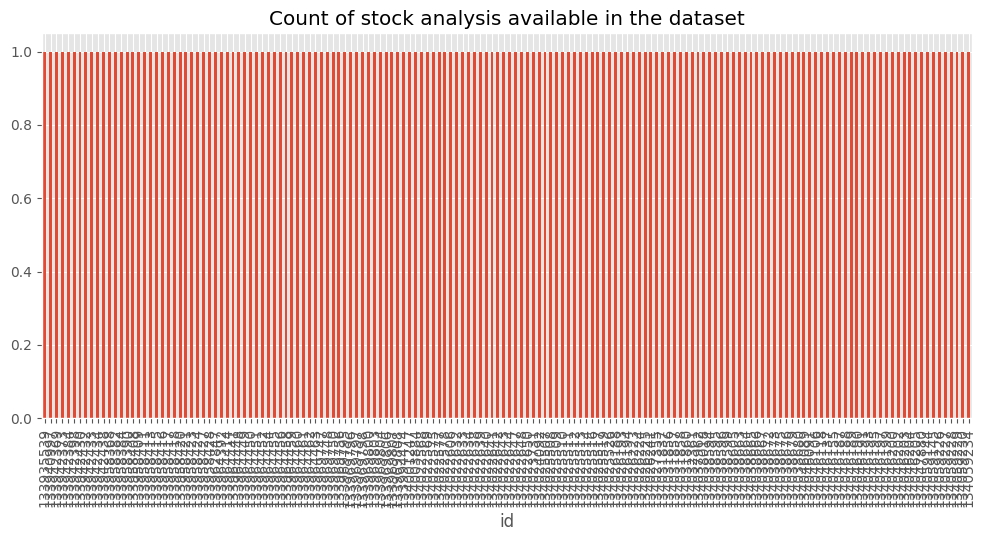

In [13]:
stock_data_cleaned['id'].value_counts().sort_index().plot(kind='bar',title='Count of stock analysis available in the dataset',
                                                          figsize=(12,5))

Basic NLTK

In [14]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/maheshg/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/maheshg/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/maheshg/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/maheshg/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/maheshg/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]  

True

In [18]:
stock_data_cleaned.describe()

,datetime,id
count,1.580000e+02,1.580000e+02
mean,1.745167e+09,1.340055e+08
std,2.027527e+05,3.824469e+04
min,1.744823e+09,1.339355e+08
25%,1.744965e+09,1.339645e+08
50%,1.745242e+09,1.340226e+08
75%,1.745344e+09,1.340386e+08
max,1.745449e+09,1.340592e+08


In [19]:
type(stock_data_cleaned)

pandas.core.frame.DataFrame

In [20]:
str(stock_data_cleaned)

"    category    datetime                                           headline  \\\n0    company  1745449200  Alphabet earnings, Fed comments, Nintendo Swit...   \n1    company  1745446095  Is Alphabet Inc.\xa0(GOOGL) the Best Stock to Buy...   \n2    company  1745442355  Is Alphabet Inc. (GOOG) the Best Stock to Buy ...   \n3    company  1745440328  Google earnings are coming today. Here's what ...   \n4    company  1745439372  Equity Markets Close Higher Over Potential Red...   \n..       ...         ...                                                ...   \n222  company  1744855128  Is Alphabet Inc. (GOOG) the Best Blue Chip Sto...   \n224  company  1744841643  Meta Saw TikTok as ‘Highly Urgent’ Threat, Zuc...   \n225  company  1744835071  Nvidia's $5.5B charge: 'Nobody' should be 'sur...   \n228  company  1744823999          Prominent Investor Unloads His GOOG Stock   \n229  company  1744822824  Is Alphabet Inc. (NASDAQ:GOOGL) the Best Machi...   \n\n            id                   

In [33]:
example1 = stock_data_cleaned['headline']

In [22]:
print(example1)

0      Alphabet earnings, Fed comments, Nintendo Swit...
1      Is Alphabet Inc. (GOOGL) the Best Stock to Buy...
2      Is Alphabet Inc. (GOOG) the Best Stock to Buy ...
3      Google earnings are coming today. Here's what ...
4      Equity Markets Close Higher Over Potential Red...
                             ...                        
222    Is Alphabet Inc. (GOOG) the Best Blue Chip Sto...
224    Meta Saw TikTok as ‘Highly Urgent’ Threat, Zuc...
225    Nvidia's $5.5B charge: 'Nobody' should be 'sur...
228            Prominent Investor Unloads His GOOG Stock
229    Is Alphabet Inc. (NASDAQ:GOOGL) the Best Machi...
Name: headline, Length: 158, dtype: object


In [ ]:
tagged1 = 